In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine.csv',usecols=[0,1,13])

In [3]:
df.head()

,Alcohol,Malic_Acid,Customer_Segment
0,14.23,1.71,1
1,13.20,1.78,1
2,13.16,2.36,1
3,14.37,1.95,1
4,13.24,2.59,1


In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop('Customer_Segment',axis=1),df['Customer_Segment'],test_size=0.3,random_state=0)

x_train.shape,x_test.shape

((124, 2), (54, 2))

# Now use MaxAbsScaler

In [8]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# convert int DataFrame

In [9]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

# before Values

In [10]:
np.round(x_train.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


# After

In [12]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


# Scatter Graph

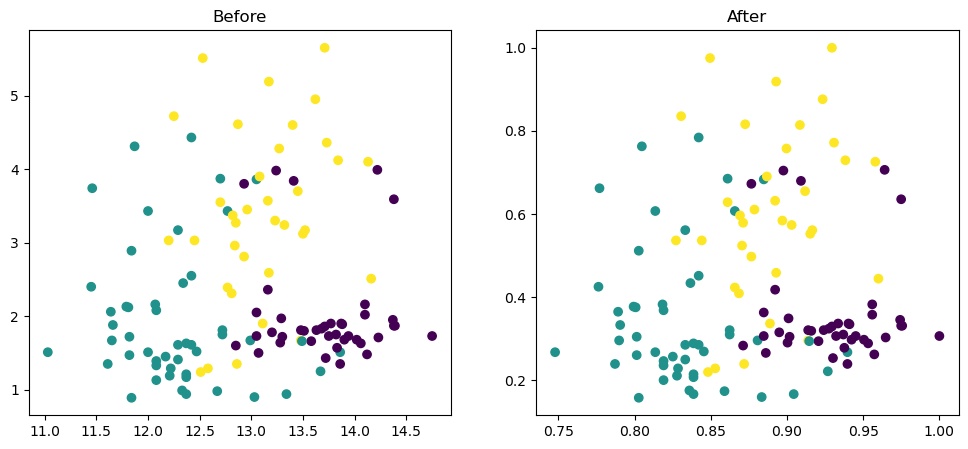

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before')
ax1.scatter(x_train['Alcohol'],x_train['Malic_Acid'],c=y_train)


ax2.set_title("After")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic_Acid'],c=y_train)

# Kdeplot

<Axes: title={'center': 'After'}, xlabel='Alcohol', ylabel='Density'>

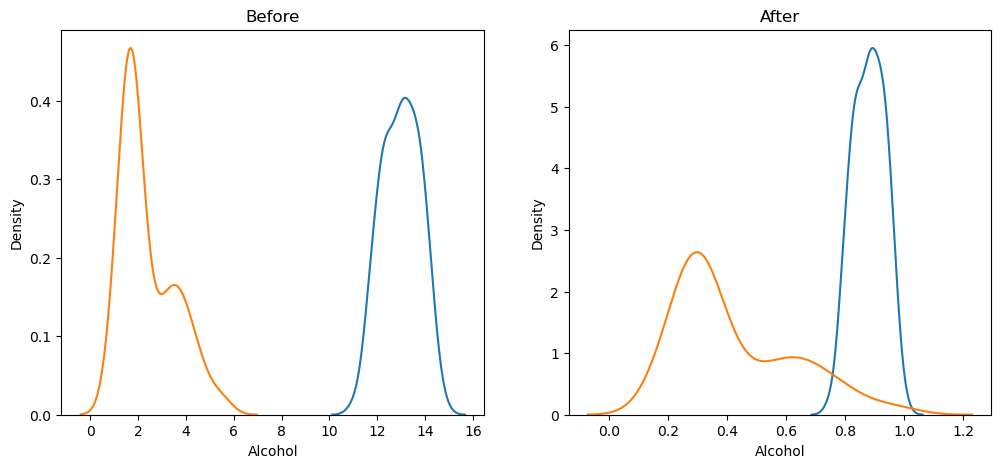

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before')

sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic_Acid'],ax=ax1)



ax2.set_title("After")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic_Acid'],ax=ax2)
